Importing Dataset from Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"josealg","key":"7a48c6e737bf20559554911d371a75bc"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle #Create the directory
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd #Print Working Directory
!kaggle datasets download -d muhammadmuzamil5500/gemstones

Convert dataset into a PyTorch dataset

In [2]:
!pip install keras

Found 3040 images belonging to 6 classes.
Found 1500 images belonging to 6 classes.
Found 1500 images belonging to 6 classes.
Epoch 1/50
 5/95 [>.............................] - ETA: 15s - loss: 4.7175 - accuracy: 0.4625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


95/95 [==============================] - 42s 393ms/step - loss: 3.5636 - accuracy: 0.7753 - val_loss: 5.1451 - val_accuracy: 0.1667
Epoch 2/50
95/95 [==============================] - 41s 433ms/step - loss: 2.3689 - accuracy: 0.8526 - val_loss: 5.9944 - val_accuracy: 0.1733
Epoch 3/50
95/95 [==============================] - 37s 392ms/step - loss: 1.5960 - accuracy: 0.8882 - val_loss: 4.0570 - val_accuracy: 0.3040
Epoch 4/50
95/95 [==============================] - 36s 385ms/step - loss: 1.1389 - accuracy: 0.9095 - val_loss: 2.7556 - val_accuracy: 0.3307
Epoch 5/50
95/95 [==============================] - 36s 380ms/step - loss: 0.9234 - accuracy: 0.9026 - val_loss: 2.2734 - val_accuracy: 0.4013
Epoch 6/50
95/95 [==============================] - 37s 384ms/step - loss: 0.7361 - accuracy: 0.9220 - val_loss: 1.5023 - val_accuracy: 0.5987
Epoch 7/50
95/95 [==============================] - 36s 381ms/step - loss: 0.6413 - accuracy: 0.9181 - val_loss: 1.1292 - val_accuracy: 0.7500
Epoch 8/50

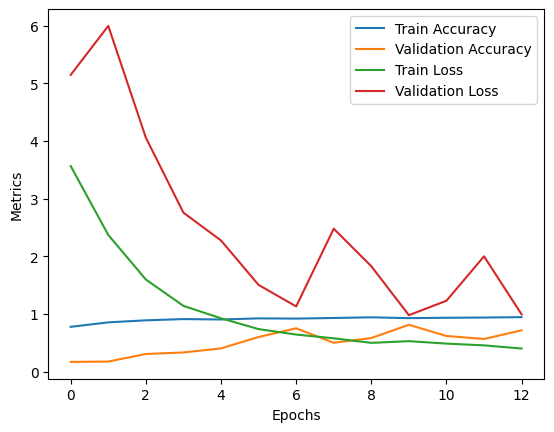

47/47 [==============================] - 8s 161ms/step - loss: 0.8284 - accuracy: 0.7973

Test Accuracy: 0.7973, Test Loss: 0.8284
47/47 [==============================] - 7s 155ms/step

Predictions and True Labels for Five Test Elements:
Element 1 - Predicted: 1, True Label: 0
Element 2 - Predicted: 2, True Label: 0
Element 3 - Predicted: 1, True Label: 0
Element 4 - Predicted: 1, True Label: 0
Element 5 - Predicted: 0, True Label: 0

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.15      0.17       250
           1       0.16      0.24      0.19       250
           2       0.21      0.23      0.22       250
           3       0.16      0.22      0.19       250
           4       0.19      0.18      0.18       250
           5       0.18      0.08      0.11       250

    accuracy                           0.18      1500
   macro avg       0.18      0.18      0.18      1500
weighted avg       0.18      0.18      0.18      

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Define the image size and channels
img_size = (128, 128)
channels = 3

# Define the paths to your train, test, and validation folders
train_path = "/content/drive/MyDrive/FYP_Datasets/train"
test_path = "/content/drive/MyDrive/FYP_Datasets/test"
validation_path = "/content/drive/MyDrive/FYP_Datasets/validation"

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training, testing, and validation
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'  # assuming multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_path,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

def build_model(model_filename):
    # Define callbacks for early stopping and model checkpoint
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(), input_shape=(img_size[0], img_size[1], channels)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2()))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2()))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2()))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2()))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.15))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model, early_stopping


# Check if the model file exists
model_directory = '/content/drive/MyDrive/FYP_Datasets/CNN'
model_filename = os.path.join(model_directory, 'last_model.h5')

# Check if the model file exists
if os.path.exists(model_filename):
    # Load the existing model
    model = tf.keras.models.load_model(model_filename)
else:
    # Build a new model
    model, early_stopping, = build_model(model_filename)

# Define callback for model checkpoint
model_checkpoint = ModelCheckpoint(model_filename, monitor='loss', save_best_only=True, save_weights_only=False, save_freq=5)

# Compile the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


# Print accuracy, loss, recall, and precision
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(validation_generator)

print(f"Train Accuracy: {train_acc:.4f}, Train Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Validation Loss: {val_loss:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Print predictions and true labels for five test elements
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
true_labels = test_generator.classes

print("\nPredictions and True Labels for Five Test Elements:")
for i in range(5):
    print(f"Element {i + 1} - Predicted: {tf.argmax(predictions[i])}, True Label: {true_labels[i]}")

# Compute and print precision and recall
predicted_labels = tf.argmax(predictions, axis=1)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(conf_matrix)